In [58]:
#Importation des bibliothèques pour l'analyse des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})

# Code optionnel pour éliminer les warnings

from warnings import filterwarnings
filterwarnings('ignore')

In [59]:
#Téléchargement du jeu de données et visualisations des 5 premières lignes
data=pd.read_excel('rapport_cibles_MAGAL.xlsx', parse_dates=['Dates'], index_col='Dates')
data.head()

,POSTE_SOURCES,FEDEER,OUVRAGE,Puissance,Rapport_TC,rapport_tp,U1,U2,U3,V1,V2,V3,I1,I2,I3,Puissance Active,S_Approximee,Q_Approximee
Dates,,,,,,,,,,,,,,,,,,
2021-09-21 00:00:00,TOUBA,MBACKE,DAROU MARNANE,630,200,1,NaN,NaN,NaN,NaN,NaN,NaN,328.0,369.4,444.6,266.006,NaN,NaN
2021-09-21 00:01:00,TOUBA,MBACKE,DAROU MARNANE,630,200,1,NaN,NaN,NaN,NaN,NaN,NaN,328.8,369.2,440.0,264.843,NaN,NaN
2021-09-21 00:02:00,TOUBA,MBACKE,DAROU MARNANE,630,200,1,NaN,NaN,NaN,NaN,NaN,NaN,327.0,366.2,434.6,262.643,NaN,NaN
2021-09-21 00:03:00,TOUBA,MBACKE,DAROU MARNANE,630,200,1,NaN,NaN,NaN,NaN,NaN,NaN,325.2,373.2,433.6,263.213,NaN,NaN
2021-09-21 00:04:00,TOUBA,MBACKE,DAROU MARNANE,630,200,1,NaN,NaN,NaN,NaN,NaN,NaN,322.2,369.4,437.6,263.493,NaN,NaN


# Analyse exploratoire des données(EDA)

In [60]:
#Voir les colonnes de notre jeu de données
data.columns

Index(['POSTE_SOURCES', 'FEDEER', 'OUVRAGE', 'Puissance', 'Rapport_TC',
       'rapport_tp', 'U1', 'U2', 'U3', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3',
       'Puissance Active', 'S_Approximee', 'Q_Approximee'],
      dtype='object')

In [61]:
#Sélection de variables
df=data[['OUVRAGE', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3',
       'Puissance Active']]
df.head()

,OUVRAGE,V1,V2,V3,I1,I2,I3,Puissance Active
Dates,,,,,,,,
2021-09-21 00:00:00,DAROU MARNANE,NaN,NaN,NaN,328.0,369.4,444.6,266.006
2021-09-21 00:01:00,DAROU MARNANE,NaN,NaN,NaN,328.8,369.2,440.0,264.843
2021-09-21 00:02:00,DAROU MARNANE,NaN,NaN,NaN,327.0,366.2,434.6,262.643
2021-09-21 00:03:00,DAROU MARNANE,NaN,NaN,NaN,325.2,373.2,433.6,263.213
2021-09-21 00:04:00,DAROU MARNANE,NaN,NaN,NaN,322.2,369.4,437.6,263.493


In [62]:
#Visualiser les 5 premieres lignes de notre jeu de données
df.head()

,OUVRAGE,V1,V2,V3,I1,I2,I3,Puissance Active
Dates,,,,,,,,
2021-09-21 00:00:00,DAROU MARNANE,NaN,NaN,NaN,328.0,369.4,444.6,266.006
2021-09-21 00:01:00,DAROU MARNANE,NaN,NaN,NaN,328.8,369.2,440.0,264.843
2021-09-21 00:02:00,DAROU MARNANE,NaN,NaN,NaN,327.0,366.2,434.6,262.643
2021-09-21 00:03:00,DAROU MARNANE,NaN,NaN,NaN,325.2,373.2,433.6,263.213
2021-09-21 00:04:00,DAROU MARNANE,NaN,NaN,NaN,322.2,369.4,437.6,263.493


In [63]:
#la longueur de notre jeu de données
len(df)

62059

In [64]:
#Renommer la features Puissance Active en P
df.rename(columns={'Puissance Active':'P'}, inplace=True)

In [65]:
#Nombre de ligne null
df.isnull().sum(axis=0)/len(df)*100

OUVRAGE     0.000000
V1         21.332925
V2         21.332925
V3         21.332925
I1          5.338468
I2          5.338468
I3          5.338468
P           5.338468
dtype: float64

In [66]:
#Traitement des valeurs manquantes: suppression des lignes où tous les features sont null
df.dropna(subset=['V1','V2','V3','I1','I2','I3','P'], axis=0, how='all', inplace=True)
len(df)

58746

In [67]:
df.isnull().sum(axis=0)

OUVRAGE       0
V1         9926
V2         9926
V3         9926
I1            0
I2            0
I3            0
P             0
dtype: int64

In [68]:
#Remplacement des valeurs null par la moyennne ou la mode: technique d'imputation par la moyenne
df['V1'].fillna(value=df['V1'].mean(), axis=0, inplace=True)
df['V2'].fillna(value=df['V2'].mean(), axis=0, inplace=True)
df['V3'].fillna(value=df['V3'].mean(), axis=0, inplace=True)
df

,OUVRAGE,V1,V2,V3,I1,I2,I3,P
Dates,,,,,,,,
2021-09-21 00:00:00,DAROU MARNANE,240.473232,240.495809,240.045807,328.0,369.4,444.6,266.006
2021-09-21 00:01:00,DAROU MARNANE,240.473232,240.495809,240.045807,328.8,369.2,440.0,264.843
2021-09-21 00:02:00,DAROU MARNANE,240.473232,240.495809,240.045807,327.0,366.2,434.6,262.643
2021-09-21 00:03:00,DAROU MARNANE,240.473232,240.495809,240.045807,325.2,373.2,433.6,263.213
2021-09-21 00:04:00,DAROU MARNANE,240.473232,240.495809,240.045807,322.2,369.4,437.6,263.493
...,...,...,...,...,...,...,...,...
2021-09-28 23:26:00,PALENE ROUTE DE MBACKE,243.400000,243.300000,243.000000,469.6,467.0,475.2,329.796
2021-09-28 23:27:00,PALENE ROUTE DE MBACKE,243.500000,243.600000,243.100000,487.2,464.4,502.8,340.093
2021-09-28 23:28:00,PALENE ROUTE DE MBACKE,243.400000,243.400000,243.000000,475.6,464.0,470.8,329.400


In [69]:
df.isnull().sum()

OUVRAGE    0
V1         0
V2         0
V3         0
I1         0
I2         0
I3         0
P          0
dtype: int64

In [70]:
len(df)

58746

In [71]:
#Nombre d'observation par ouvrages
df.OUVRAGE.value_counts()

MINAM 7                   17013
DAROU MARNANE              9471
PALENE ROUTE DE MBACKE     9137
OCASE CPT2                 7851
DAROU MINAM 1              5885
PALENE                     5410
DAROU MINAM 2              3979
Name: OUVRAGE, dtype: int64

In [72]:
#df.to_excel(r"C:\Users\dell\Desktop\Projet_Analyse_Magal2021\donnees_utiles.xlsx")

# Analyse univariée des variables U, I, P 

In [73]:
import seaborn as sns

In [74]:
#Poste Minam 7
df_dmarnane=df[df.OUVRAGE=='DAROU MARNANE']
df_dmarnane.head()

,OUVRAGE,V1,V2,V3,I1,I2,I3,P
Dates,,,,,,,,
2021-09-21 00:00:00,DAROU MARNANE,240.473232,240.495809,240.045807,328.0,369.4,444.6,266.006
2021-09-21 00:01:00,DAROU MARNANE,240.473232,240.495809,240.045807,328.8,369.2,440.0,264.843
2021-09-21 00:02:00,DAROU MARNANE,240.473232,240.495809,240.045807,327.0,366.2,434.6,262.643
2021-09-21 00:03:00,DAROU MARNANE,240.473232,240.495809,240.045807,325.2,373.2,433.6,263.213
2021-09-21 00:04:00,DAROU MARNANE,240.473232,240.495809,240.045807,322.2,369.4,437.6,263.493


In [75]:
df_dmarnane.isnull().sum()/len(df_dmarnane)*100

OUVRAGE    0.0
V1         0.0
V2         0.0
V3         0.0
I1         0.0
I2         0.0
I3         0.0
P          0.0
dtype: float64

In [76]:
#Statistiques descriptivesdu jeu de données 
df_dmarnane.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V1,9471.0,238.948184,4.192501,0.0,237.4000,239.70,240.473232,249.20
V2,9471.0,238.856136,4.194807,0.0,237.3000,239.50,240.495809,249.40
V3,9471.0,238.203438,4.220290,0.0,236.6000,238.80,240.045807,248.30
I1,9471.0,382.750987,94.353280,0.0,307.6000,378.20,453.800000,620.20
I2,9471.0,420.891395,106.646183,0.0,340.2000,413.60,495.800000,691.80
I3,9471.0,477.025826,122.272323,0.0,375.4000,475.00,569.600000,780.60
P,9471.0,296.285904,76.739331,0.0,233.9445,290.71,353.428000,484.19


In [77]:
df_dmarnane.isnull().sum()

OUVRAGE    0
V1         0
V2         0
V3         0
I1         0
I2         0
I3         0
P          0
dtype: int64

In [78]:
len(df_dmarnane)

9471

In [79]:
#Resample: aggrégation of data: jours en mois, mois en année
#data_minam7=df_minam7.resample('H').sum()
data_dmarnane=df_dmarnane.copy()

In [80]:
len(data_dmarnane)

9471

Text(0.5, 1.0, 'Evolution des paramètres électriques de Darou Marnane')

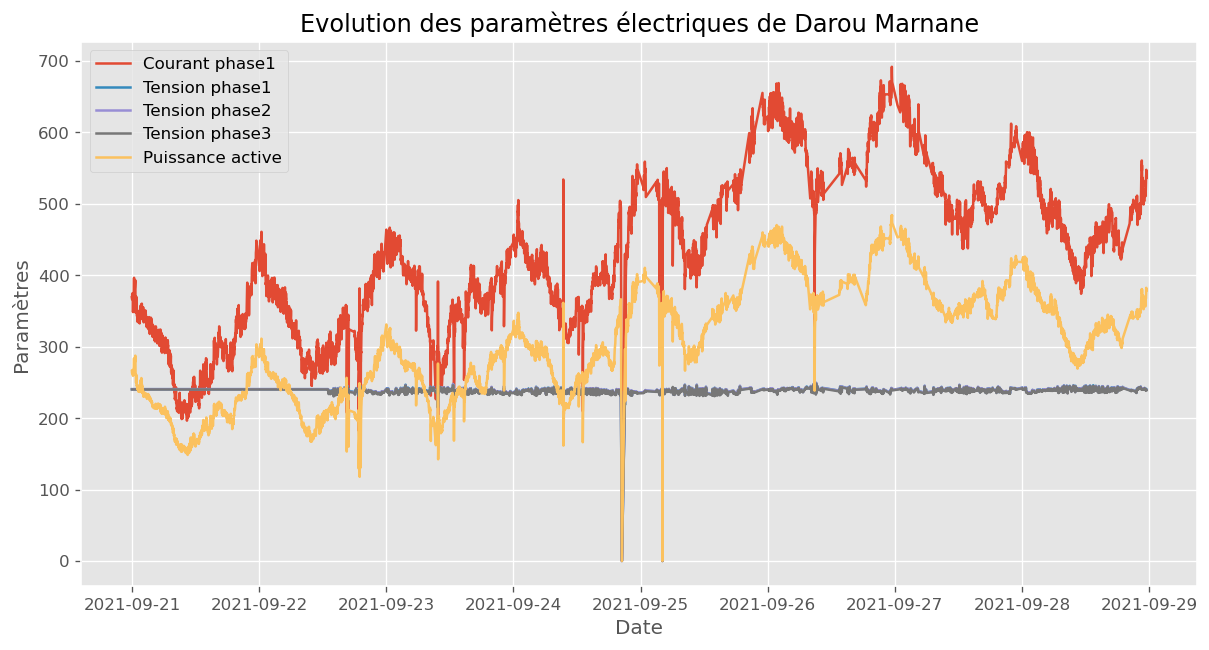

In [81]:
#Analyse variables quantitatives continues: 
#Affichage des données
plt.figure(figsize=(12,6))
plt.plot(data_dmarnane.I2, label='Courant phase1')
plt.plot(data_dmarnane.V1, label='Tension phase1')
plt.plot(data_dmarnane.V2, label='Tension phase2')
plt.plot(data_dmarnane.V3, label='Tension phase3')
plt.plot(data_dmarnane['P'], label='Puissance active')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Paramètres')
plt.title('Evolution des paramètres électriques de Darou Marnane')

In [82]:
#Selection de variables: Features Engeneering
Var='V1'  #'V2','V3','I1','I2','I3','P']
poste='PALENE'
df_params=df[df.OUVRAGE==poste][[Var]]
#df_params=df_params.resample('H').sum()


In [83]:
df_params

,V1
Dates,
2021-09-03 00:00:00,240.473232
2021-09-03 00:01:00,240.473232
2021-09-03 00:02:00,240.473232
2021-09-03 00:03:00,240.473232
2021-09-03 00:04:00,240.473232
...,...
2021-09-28 22:50:00,255.900000
2021-09-28 23:00:00,256.000000
2021-09-28 23:10:00,256.100000


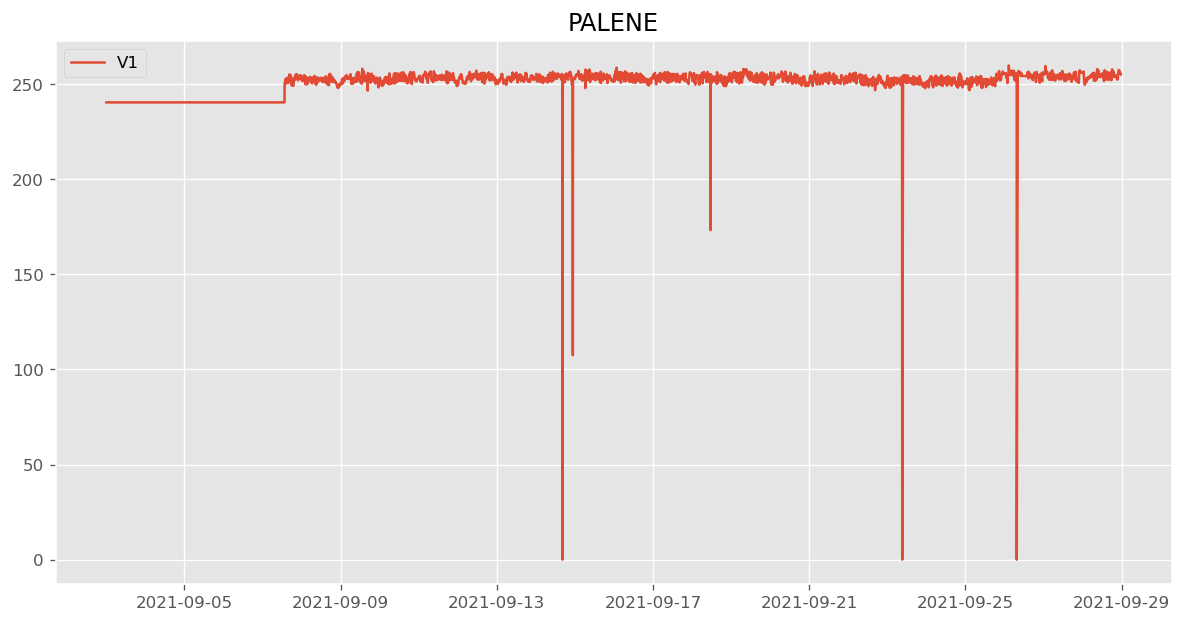

In [84]:
plt.figure(figsize=(12,6))
#plt.plot(df_params['P'], label=Var)
plt.plot(df_params[Var], label=Var)
#plt.plot(df_params[Var], label=Var)
plt.title(poste)
plt.legend()

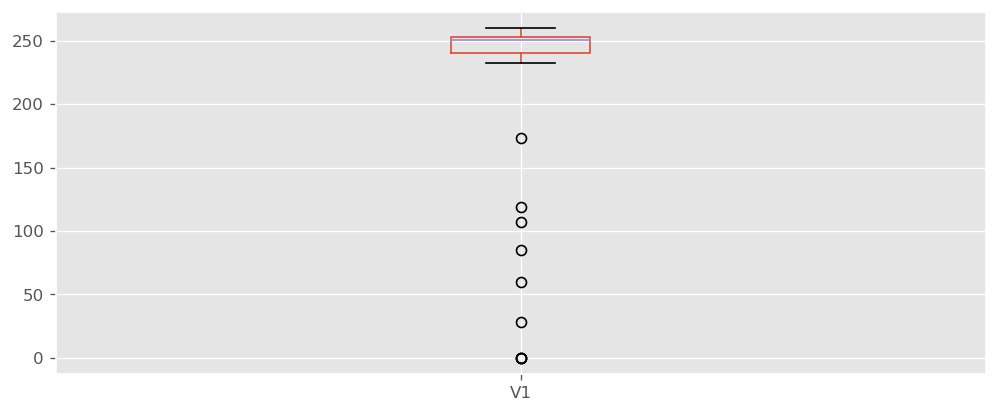

In [85]:
#Boite à moustache
df_params[Var].plot(kind='box', figsize=(10,4), label=Var)
plt.show()

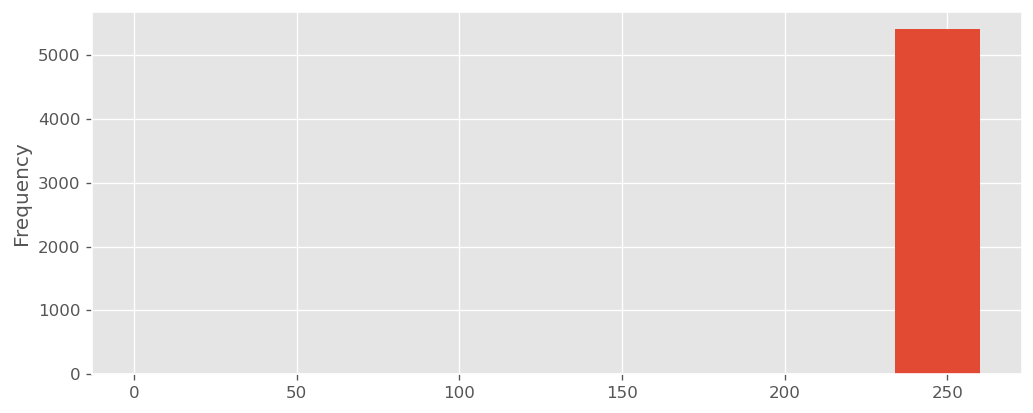

In [86]:
#Histogramme
df_params[Var].plot(kind='hist', figsize=(10,4), label=Var)
plt.show()

In [87]:
df_params

,V1
Dates,
2021-09-03 00:00:00,240.473232
2021-09-03 00:01:00,240.473232
2021-09-03 00:02:00,240.473232
2021-09-03 00:03:00,240.473232
2021-09-03 00:04:00,240.473232
...,...
2021-09-28 22:50:00,255.900000
2021-09-28 23:00:00,256.000000
2021-09-28 23:10:00,256.100000


In [88]:
df_params.sort_values(by=['Dates'], inplace=True)
df_params

,V1
Dates,
2021-09-03 00:00:00,240.473232
2021-09-03 00:01:00,240.473232
2021-09-03 00:02:00,240.473232
2021-09-03 00:03:00,240.473232
2021-09-03 00:04:00,240.473232
...,...
2021-09-28 22:50:00,255.900000
2021-09-28 23:00:00,256.000000
2021-09-28 23:10:00,256.100000


In [89]:
#df_params.to_excel(r"C:\Users\dell\Desktop\Projet_Analyse_Magal2021\test.xlsx")

# Data Preprocessing

In [90]:
#95% des données pour l'entrainement
train_size = int(len(df_params) * 0.60)
test_size = len(df_params) - train_size
train, test = df_params.iloc[0:train_size], df_params.iloc[train_size:len(df_params)]
print(train.shape)
print(test.shape)

(3246, 1)
(2164, 1)


In [91]:
len(test)

2164

In [92]:
#Standardisation des données
from sklearn.preprocessing import StandardScaler, RobustScaler
#scaler=RobustScaler(quantile_range=(25, 75))
scaler=StandardScaler()
scaler=scaler.fit(train[[Var]])
train[Var]=scaler.transform(train[[Var]])
test[Var]=scaler.transform(test[[Var]])

In [93]:
train.shape

(3246, 1)

In [94]:
#décomposition en sous-séquence
def to_sequence(X, y, time_steps=1):
    a, b = [], []
    for i in range(len(X)-time_steps):
        v=X.iloc[i:(i + time_steps)].values
        a.append(v)
        b.append(y.iloc[i + time_steps])
    return np.array(a), np.array(b)


In [95]:
#Séquence avec 30 jours de données historiques
n_step=5
#remodeler en 3D[n_sample, n_steps, n_features]
X_train, y_train = to_sequence(train[[Var]], train[Var],n_step)
X_test, y_test = to_sequence(test[[Var]], test[Var],n_step)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

X_train shape (3241, 5, 1)
X_test shape (2159, 5, 1)


# Modélisation: LSTM et Auto-encoder

In [96]:
#Création du model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, RepeatVector, TimeDistributed


In [97]:
#Création du model
model=Sequential()

In [98]:
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 5, 64)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 64)             33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 64)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 1)              65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
__________________________________________________

In [99]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)  #patience= nombre d'epoch avant d'arreter

In [100]:
history = model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=32,
                   validation_split=0.1,
                   shuffle=False, callbacks=[early_stop])

Epoch 1/50
92/92 [==============================] - 10s 33ms/step - loss: 0.1124 - val_loss: 0.3088
Epoch 2/50
92/92 [==============================] - 1s 13ms/step - loss: 0.0165 - val_loss: 0.0948
Epoch 3/50
92/92 [==============================] - 1s 13ms/step - loss: 0.0086 - val_loss: 0.0650
Epoch 4/50
92/92 [==============================] - 1s 13ms/step - loss: 0.0090 - val_loss: 0.0571
Epoch 5/50
92/92 [==============================] - 1s 13ms/step - loss: 0.0080 - val_loss: 0.0629
Epoch 6/50
92/92 [==============================] - 1s 12ms/step - loss: 0.0088 - val_loss: 0.0589


In [101]:
X_train_pred=model.predict(X_train)
train_mae_loss=np.mean(np.abs(X_train_pred - X_train), axis=1)


In [102]:
X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)


In [103]:
train_mae_loss

array([[0.00962143],
       [0.00962143],
       [0.00962143],
       ...,
       [0.14447046],
       [0.17658458],
       [0.1863368 ]])

In [104]:
test_score_df=pd.DataFrame(index=test[n_step:].index)
test_score_df['loss']=test_mae_loss


In [105]:
#calculer le seuil
std_x_train=np.std(test_score_df.loss)*3
mean_x_train=np.mean(test_score_df.loss)
THRESHOLD = std_x_train
THRESHOLD

4.135687211290939

In [107]:
test_score_df['threshold']=THRESHOLD
test_score_df['anomaly']=test_score_df.loss>test_score_df.threshold
test_score_df[Var]=test[n_step:][Var]

In [108]:
anomalies = test_score_df[test_score_df.anomaly==True]

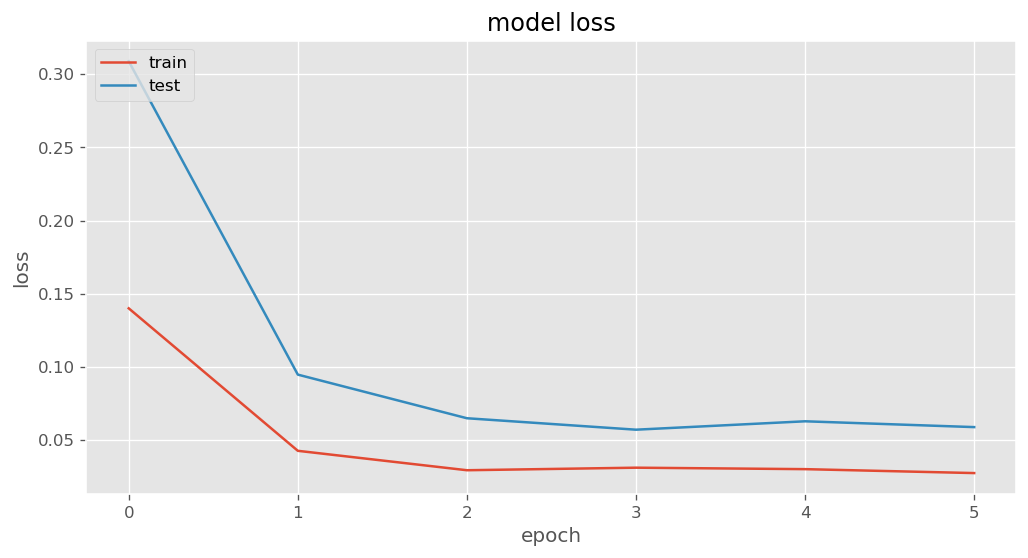

In [109]:
# history for loss
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

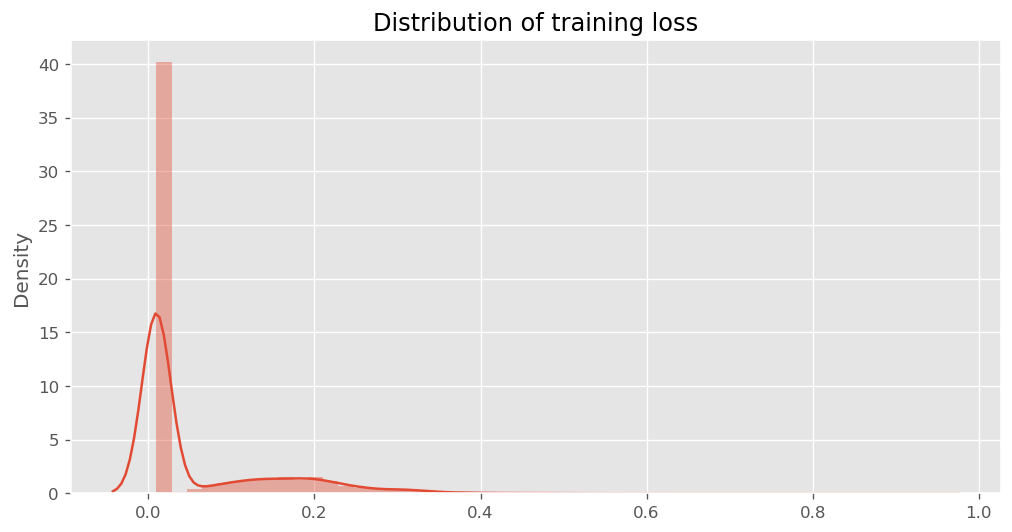

In [110]:
#MAE sur les données d'entrainement
plt.figure(figsize=(10,5))
sns.distplot(train_mae_loss, bins=50, kde=True)
plt.title('Distribution of training loss')
plt.show()

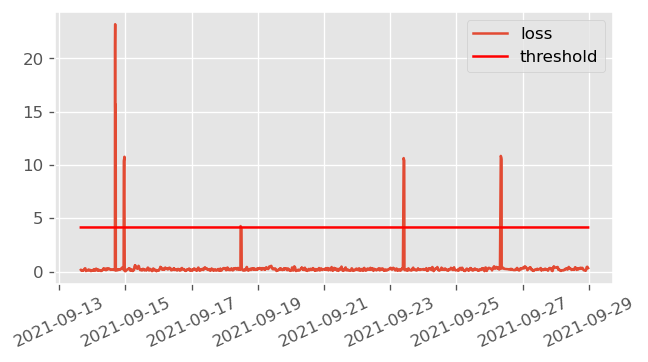

In [111]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold', color='r')
plt.xticks(rotation=25)
plt.legend()
plt.show()

In [112]:
anomalies 

,loss,threshold,anomaly,V1
Dates,,,,
2021-09-14 16:22:43,7.486895,4.135687,True,-43.773698
2021-09-14 16:23:05,15.166164,4.135687,True,1.098347
2021-09-14 16:23:42,15.025392,4.135687,True,1.134259
2021-09-14 16:24:45,14.995968,4.135687,True,-33.089877
2021-09-14 16:26:56,21.184496,4.135687,True,-38.746018
2021-09-14 16:33:46,23.205940,4.135687,True,1.529291
2021-09-14 16:35:26,15.403901,4.135687,True,1.457467
2021-09-14 16:40:00,15.492422,4.135687,True,1.619071
2021-09-14 16:50:00,15.669177,4.135687,True,1.798631


In [113]:
#Compter le nombre d'anomalies
anomalies_str=str(anomalies.count())
anomalies_str

'loss         28\nthreshold    28\nanomaly      28\nV1           28\ndtype: int64'

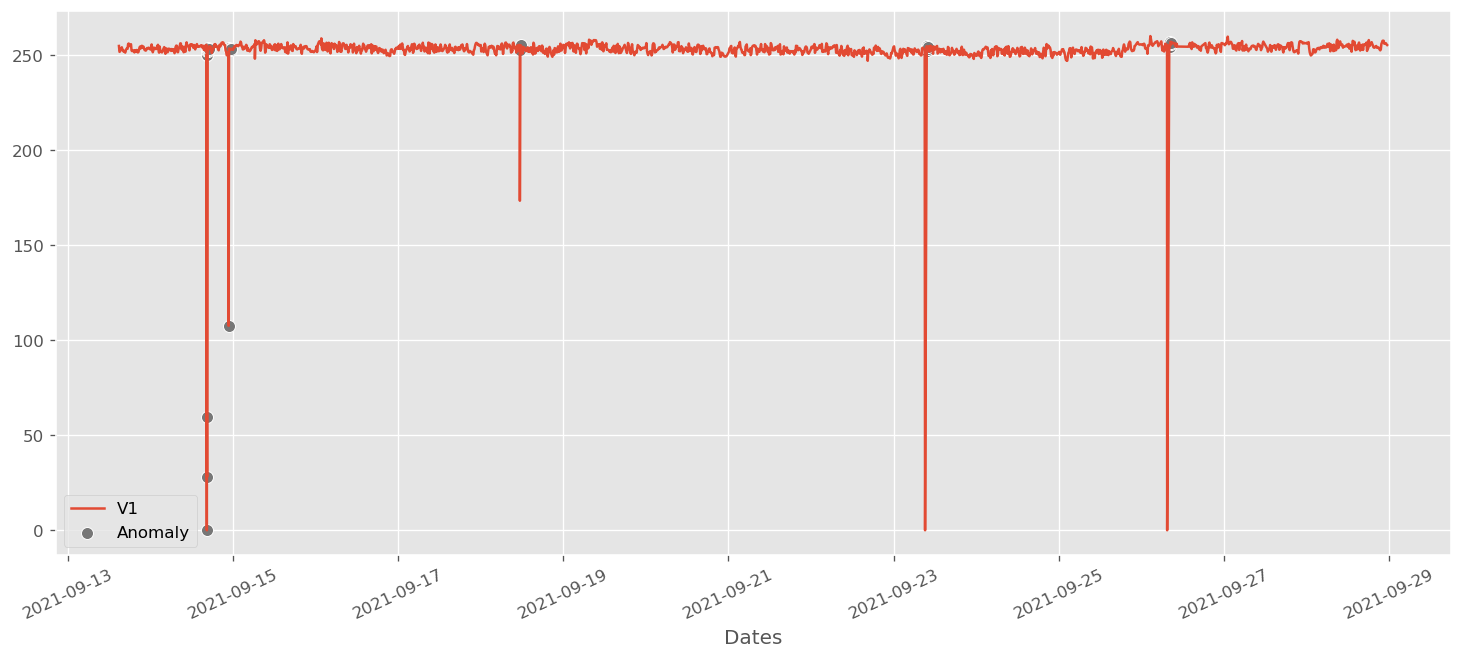

In [114]:
plt.figure(figsize=(15,6))
plt.plot(
         test.index,
         scaler.inverse_transform(test[Var]),
          label=Var);
sns.scatterplot(
                anomalies.index,
                scaler.inverse_transform(anomalies[Var]),
                color=sns.color_palette()[3],
                 s=52,
                 label='Anomaly')
plt.xticks(rotation=25)
plt.legend()